# 1.Introdução

![dropout circle logo](./img/dropout.jpg "Dropout")

Decerto, a evasão escolar é algo preocupante para qualquer país e estudar seus dados é de essencial para descobrirmos a origem do problema. A evasão escolar pode surgir a partir de escolas com uma estrutura ruim, uma falta de renda na família que pode induzir ao trabalho infantil, adesão à crimes, dentre outras. Avaliar essa situação é importante para todo o país, pensando nisso irá ser avaliado a partir de um banco de dados da Índia, que foi publicado no Kaggle, sobre a evasão escolar por região e qual a sua relação com a infraestrutura escolar. No site eles propõe as seguintes perguntas:
1. Quais estados têm a maior taxa de abandono?
2. Os meninos e as meninas têm água e banheiros suficientes disponíveis?
3. Como é a Taxa Bruta de Matrículas para meninos e meninas nos diversos níveis da vida escolar?
4. Em qual nível de vida escolar há menor número de matrículas? Está caindo ou aumentando?

No Kaggle temos um post com banco de dados da educação na Índia (https://www.kaggle.com/datasets/saswatahalder/india-education-statistics) nele temos os seguintes arquivos:
1. Evasão escolar de 2012-2013 até 2014-2015
2. Índicie Bruto de Matrículas (GER) de 2013-2014 até 2015-2016
3. Porcentagem de escolas com instalação de água potável entre 2013-2014 até 2015-2016
4. Porcentagem de escolas com Computadores entre 2013-2014 até 2015-2016
5. Porcentagem de escolas com Eletricidade entre 2013-2014 até 2015-2016
6. Porcentagem de escolas com Banheiros Masculinos entre 2013-2014 até 2015-2016
7. Porcentagem de escolas com Banheiros Femininos entre 2013-2014 até 2015-2016

Nesse caso estamos de antes de uma base de dados que estão atrás de entender se as escolas são o problema para a evasão escolar da Índia. Agora será feita uma análise sobre os dados com o intuito de saber:

1. variáveis importantes ou descartáveis do problema;
2. entender o comportamento dos dados;
3. detectar anomalias ou outliers nos dados.

Com isso poderemos ter uma melhor noção do que está acontecendo e criar modelos para poder predizer ou resolver o problema.
Essa análise será dividida em algumas partes:

1. Definição
2. Evasão Escolar
3. Índice Bruto de Matrículas
4. Eletricidade, computadores e banheiros são para todo mundo?
5. Conclusão.

## 2.Definição

Antes de trabalharmos com algo temos que saber definir no que estamos trabalhando. Existem dois parâmetros importantes aqui: a Evasão escolar e o Índice Bruto de Matrículas (GER). De acordo com a UNESCO o GER é a porcentagem de número total de alunos matriculados em uma determinado nível de formação dividido pelo número de pessoas que pertencem a faixa etária correspondente ao nível escolar. Esse número pode ser maior que 100% visto que podem ter alunos a repetir a série ou algum aluno que conseguiu pular alguma série para conseguir chegar na atual. A Evasão Escolar é a razão do número de alunos que não terminaram uma determinado nível escolar dividido por? Agora vem a definição que ficou ambígua no banco de dados se a razão é obtida usando a divisão pelo número de matriculados no nível ou pelo número de pessoas que terminaram o nível (eu olhei outros notebooks mas não obtive uma resposta satisfatória para a pergunta). Essa ambiguidade será destrinchada melhor nas próximas sessões.

A Índia é formada por é uma república composta por 28 estados e 7 territórios da união, com um sistema de democracia parlamentar. Nos bancos de dados temos 4 níveis escolares:

1. Primary School: que está na faixa de 6 aos 11 anos e pertencem a classe I-IV.
2. Upper Primary School: que está na faixa de 11 aos 14 anos e pertencem a classe V-VIII.
3. Secondary School: que está na faixa de 14 aos 16 anos e pertencem a classe VIII-IX.
4. High Secondary School: que está na faixa de 16 aos 18 anos e pertencem a classe X-XII.

In [1]:
# Importação das Bibliotecas
import pandas as pd # Pandas para ler os arquivos
import numpy as np # Numpy para fazer cálculos 
import matplotlib.pyplot as plt # Matplotlib para visualização
import geopandas as gpd # Geopandas para visualização geográfica
from main import transform,ajeita_mean,generate_graphs_india,correlacao,geo_plot

In [2]:
# Importação dos Arquivos
dropout = pd.read_csv('./data/dropout-ratio-2012-2015.csv')
computer = pd.read_csv('./data/percentage-of-schools-with-comps-2013-2016.csv')
water = pd.read_csv('./data/percentage-of-schools-with-water-facility-2013-2016.csv')
eletricity = pd.read_csv('./data/percentage-of-schools-with-electricity-2013-2016.csv')
toilet_girls = pd.read_csv('./data/schools-with-girls-toilet-2013-2016.csv')
toilet_boy = pd.read_csv('./data/schools-with-boys-toilet-2013-2016.csv')
ger = pd.read_csv('./data/gross-enrollment-ratio-2013-2016.csv')
#age = pd.read_csv('./data/states.csv')
india = gpd.read_file('./data/IND_adm1.shp')

## 3.Evasão Escolar

A primeira parte é sempre olhar para os dados e ver se temos algum problema, como podemos ver logo de cara percebemos que existem alguns erros na tabela dropout. Temos por exemplo 'Upper Primary' na tabela e precisamos limpar esses dados. Vou trocar cada aparição de uma string - no caso aparecem um "NR" e "@" para representar dados não informados - pela mediana, pois como temos dados de diferentes regiões o comportamento pode ser diferente para cada um, portanto usaremos a mediana ao invés da média. Porém devo dizer que os estados Kerala, Delhi e Chandigarh e o _High Secondary_ da India não notificaram os valores de evasão

In [3]:
dropout.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [4]:
# Correção de Valores Faltantes
dropout = transform(dropout)
water = water.rename(columns={"Year":"year"})# Troca de nome das Colunas
water = water.rename(columns={"State/UT":"State_UT"})# Troca de nome das Colunas
ger['State_UT'] = ger['State_UT'].replace(['Pondicherry'],'Puducherry')
ger['State_UT'] = ger['State_UT'].replace(['MADHYA PRADESH'],'Madhya Pradesh')
ger['State_UT'] = ger['State_UT'].replace(['Uttaranchal'],'Uttarakhand')
ger = ajeita_mean(ger)
ger.columns = dropout.columns

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,Andaman & Nicobar Islands,2012-13,0.83,0.51,0.68,4.236667,1.09,1.23,5.57,5.55,5.56,17.66,10.150000,14.14
1,Andaman & Nicobar Islands,2013-14,1.35,1.06,1.21,4.236667,1.54,0.51,8.36,5.98,7.20,18.94,12.200000,15.87
2,Andaman & Nicobar Islands,2014-15,0.47,0.55,0.51,1.440000,1.95,1.69,11.47,8.16,9.87,21.05,12.210000,16.93
3,Andhra Pradesh,2012-13,3.30,3.05,3.18,3.210000,3.51,3.36,12.21,13.25,12.72,2.66,7.206974,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.460000,4.12,3.78,11.95,13.37,12.65,12.65,10.850000,11.79


Com esses dados vamos avaliar agora a primeira pergunta: **Quais estados têm a maior taxa de abandono?** Podemos primeiro avaliar de forma geral que no geral a India mantém o seu dropout quase constante. Com quedas ou crescimentos leves nesses 3 anos e é perceptível que, no caso de evasão, o estudo do "Total" é o mesmo para cada gênero separado isso se repete ao estudarmos cada estado separadamente. 

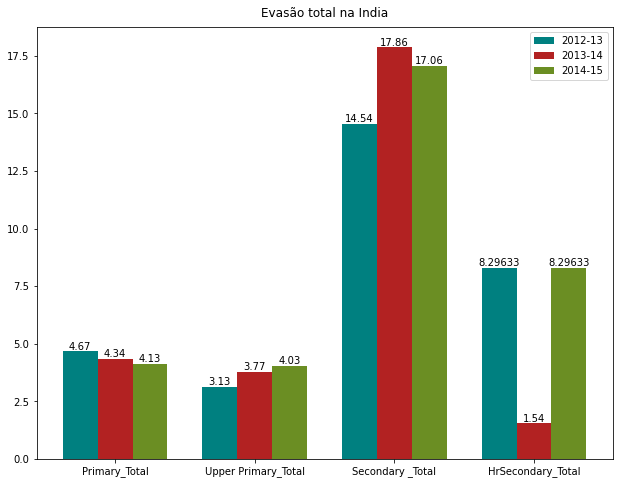

In [5]:
generate_graphs_india(dropout,'Total','Evasão total na India')

Focando nos estados percebemos novamente que analisar o total é o mesmo que analisar por gênero, e agora meu objetivo é saber não só qual é o estado com maior número de taxa de abandono mas também quais são o que mais cresce e o que mais decresce. Para resolver isso vamos analisar duas medidas estatísticas importantes: Correlação de Pearson e o Desvio Padrão.

**A Correlação de Perason** avalia o quão dependente está uma variável de outra, esse parâmetro pode ter um valor entre -1 e 1 na qual quanto mais próximo de 1 nos diz que as duas variáveis têm uma alta dependência positiva, ou seja se uma cresce outra também cresce, quanto mais próximo de -1 nos diz que as duas variáveis têm uma alta dependência negativa, ou seja se uma cresce outra também decresce, por fim quanto mais próximo de 0 nos diz que elas não têm relação nenhuma. Mas no que isso nos ajuda? Se soubermos a Correlação de Pearson da evasão com, por exemplo, uma reta podemos saber se a evasão está crescendo ou não.

Com base na correlação agora sabemos se um dado Estado a sua evasão está crescendo, decrescendo ou constante, mas como saberemos qual é o que mais cresce ou decresce? Essa resposta quem nos dará é o **Desvio Padrão**. Desvio Padrão avalia o quão distante em média estão os nossos dados da sua respectiva média. Dado uma coluna se temos vários dados com o mesmo valor, a média vai ser esse valor constante e portanto o desvio padrão será zero, contudo se há uma tendência dos dados crescer, então temos um desvio padrão diferente de zero.

Já deve entender onde quero chegar não é? Nosso desvio padrão vai determinar qual vai ser o que tiver maior crescimento ou decrescimento, porém como o desvio é uma medida sempre positiva não tem como saber só com ela qual mais cresce ou mais decresce, por isso precisamos multiplicar pela Correlação, ela que dará o sinal de positivo ou negativo e para saber qual estado tem o maior e constante taxa. Aplicando essas ideias no banco de dados conseguimos os seguintes resultados:

In [6]:
labels = dropout['State_UT'].unique()
correlacao(dropout.columns[2:],ger,labels[:-1])

Primary_Boys
A região com maior crescimento correlação é Meghalaya
A região com menor crescimento correlação é Nagaland
A região com maior Média é Arunachal Pradesh
A região com menor Média é Lakshadweep 

Primary_Girls
A região com maior crescimento correlação é Bihar
A região com menor crescimento correlação é Nagaland
A região com maior Média é Arunachal Pradesh
A região com menor Média é Lakshadweep 

Primary_Total
A região com maior crescimento correlação é Bihar
A região com menor crescimento correlação é Nagaland
A região com maior Média é Arunachal Pradesh
A região com menor Média é Lakshadweep 

Upper Primary_Boys
A região com maior crescimento correlação é Meghalaya
A região com menor crescimento correlação é Goa
A região com maior Média é Delhi
A região com menor Média é Uttar Pradesh 

Upper Primary_Girls
A região com maior crescimento correlação é Sikkim
A região com menor crescimento correlação é Lakshadweep
A região com maior Média é Chandigarh
A região com menor Média é

1. Para o Primário temos que Assam teve maior crescimento, Mizoram teve o maior decrescimento e Arunachal Pradesh é o que tem maior taxa constante.
2. Para o Upper Primário temos que Haryana teve maior crescimento, Mizoram teve o maior decrescimento e Meghalaya é o que tem maior taxa constante.
3. Para o Secundário temos que Daman & Diu teve maior crescimento, Odisha teve o maior decrescimento e Assam é o que tem maior taxa constante.
4. Para o High Secundário temos que Daman & Diu teve maior crescimento, Karnataka teve o maior decrescimento e Delhi é o que tem maior taxa constante.

Para quase todos temos aquela coerência de que equivale o total para garotos e garotas, porém para o caso 2. e 4. temos que no caso para garotas tivemos Gujarat e Andaman & Nicobar Islands, respectivamente, os com maiores médias de taxa de abandono constante. No caso geral temos que Daman & Diu teve o maior crescimento e Mizoram teve o maior decrescimento médio em todas as séries.


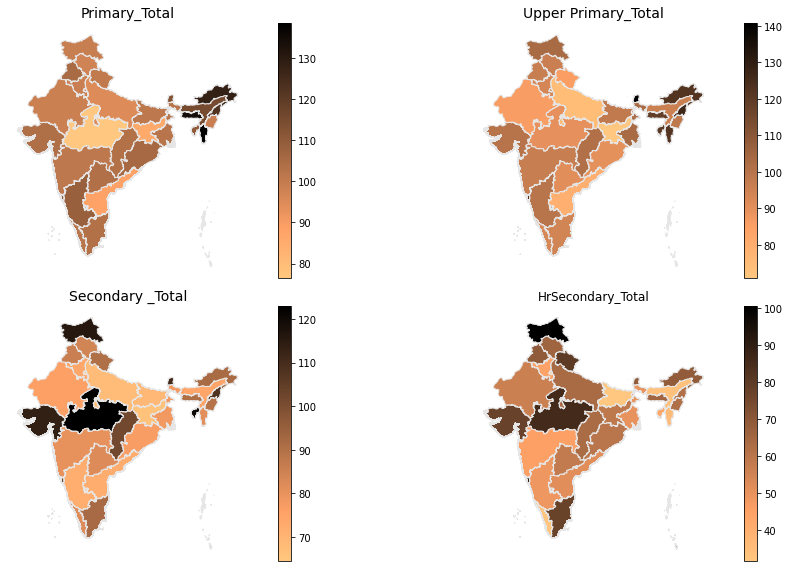

In [7]:
total = dropout.columns[dropout.columns.str.contains('Total')]
geo_plot(india,ger,'2014-15',total,'copper_r')

Por fim percebe-se que a média de evasão escolar são maiores no _Secondary_ e no _High Secondary_ sendo aquele o que tem a maior média. Isso se dá porque além de ter um vestibular para entrar em faculdades há um vestibular para entrar no Secundário, que seria o nosso ensino médio, e desde jovens os indianos têm que conviver com horas e horas de estudo e até bullying por não estar se saindo bem nas matérias, portanto logo cedo eles têm contato com pressão escolar e por isso temos um pico de evasão no _Secondary_, além disso, até os 14 anos a lei da Índia garante que todos tenham acesso a rede pública.

## Índice Bruto de Matrículas


In [8]:
ger.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.40,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.30
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.70


O primeiro passo foi ajeitar as colunas da tabela do GER para facilitar futuros cálculos. Assim como na tabela de evasão temos valores com "NR" ou "@" na qual filtramos pelo mesmo processo. Um problema ao avaliar o GER é que o seu valor sozinho não nos diz muita coisa, por exemplo se em um estado tem GER de 121% então existem 21% a mais de matriculados fora da idade da série em questão. Isso pode querer dizer que têm alunos que estão adiantados, que alunos estão atrasados, que têm alunos vindo/indo de outros estados então no final das contas esse número pode tanto dizer que a educação não está boa por muitos ainda reptirem de ano e também pode querer dizer que os alunos estão se mantendo na escola e não indo trabalhar ou cometendo crimes.

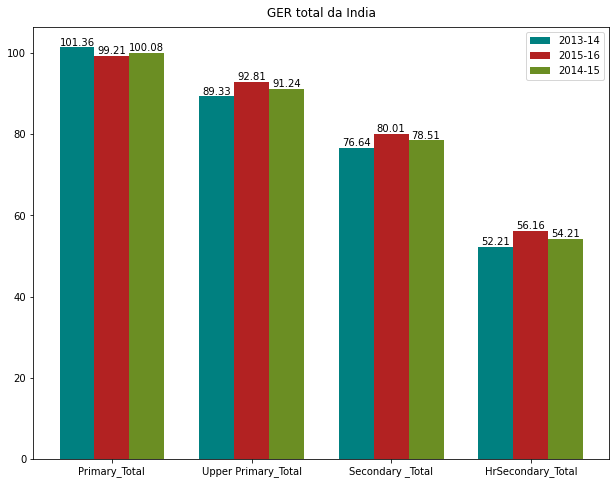

In [9]:
generate_graphs_india(ger,'Total','GER total da India')

Agora vou me concentrar na seguinte questão: **Em qual nível de vida escolar há menor número de matrículas? Está caindo ou aumentando?** Percebe-se que com o avançar das séries há um decrescimento no número do GER na Índia. No Primário há um GER próximo de 100% enquanto que para o Secundário o índice chega próximo dos 50%. E o que podemos tirar disso? Para fazermos uma análise mais profunda precisamos de outros parâmetros, contudo podemos especular algumas coisas. Como foi visto do _Upper Primary_ para o _Secondary_ há um máximo de evasão que é devido, provavelmente, pelo vestibular na entrada para o Ensino Médio. Com isso podemos perceber que o _Secondary_ pode estar sendo uma "barreira" para entrar no _High Secondary_. A lógica seria a seguinte: devido a pressão e a dificuldade do vestibular alguns alunos tendem a sair da escola e os que passam não estão conseguindo passar para o _High Secondary_ se mantendo na série. Isso explica o porquê do GER do _High Secondary_ ser maior do que do _Secondary_ e também da evasão desse ser menor que aquele, pois os que decidiram não continuar no _Secondary_ não vão continuar na escola e não vão chegar no _High Secondary_ portanto a evasão é menor.

Utilizando os mesmos cálculos da última sessão temos os seguintes resultados:

1. Para o Primário temos que Bihar teve maior crescimento, Nagaland teve o maior decrescimento e Arunachal Pradesh é o que tem maior taxa constante e Lakshadweep com menor taxa constante.
2. Para o Upper Primário temos que Meghalaya teve maior crescimento, Lakshadweep teve o maior decrescimento e Chhattisgarh é o que tem maior taxa constante e Jammu And Kashmir com menor taxa constante.
3. Para o Secundário temos que Sikkim teve maior crescimento, Andaman & Nicobar Islands teve o maior decrescimento e Mizoram é o que tem maior taxa constante e Jammu And Kashmir com menor taxa constante.
4. Para o High Secundário temos que Karnataka teve maior crescimento, Kerala teve o maior decrescimento e Himachal Pradesh é o que tem maior taxa constante e Bihair com menor taxa constante.

In [10]:
correlacao(dropout.columns[2:],ger,labels[:-1])

Primary_Boys
A região com maior crescimento correlação é Meghalaya
A região com menor crescimento correlação é Nagaland
A região com maior Média é Arunachal Pradesh
A região com menor Média é Lakshadweep 

Primary_Girls
A região com maior crescimento correlação é Bihar
A região com menor crescimento correlação é Nagaland
A região com maior Média é Arunachal Pradesh
A região com menor Média é Lakshadweep 

Primary_Total
A região com maior crescimento correlação é Bihar
A região com menor crescimento correlação é Nagaland
A região com maior Média é Arunachal Pradesh
A região com menor Média é Lakshadweep 

Upper Primary_Boys
A região com maior crescimento correlação é Meghalaya
A região com menor crescimento correlação é Goa
A região com maior Média é Delhi
A região com menor Média é Uttar Pradesh 

Upper Primary_Girls
A região com maior crescimento correlação é Sikkim
A região com menor crescimento correlação é Lakshadweep
A região com maior Média é Chandigarh
A região com menor Média é

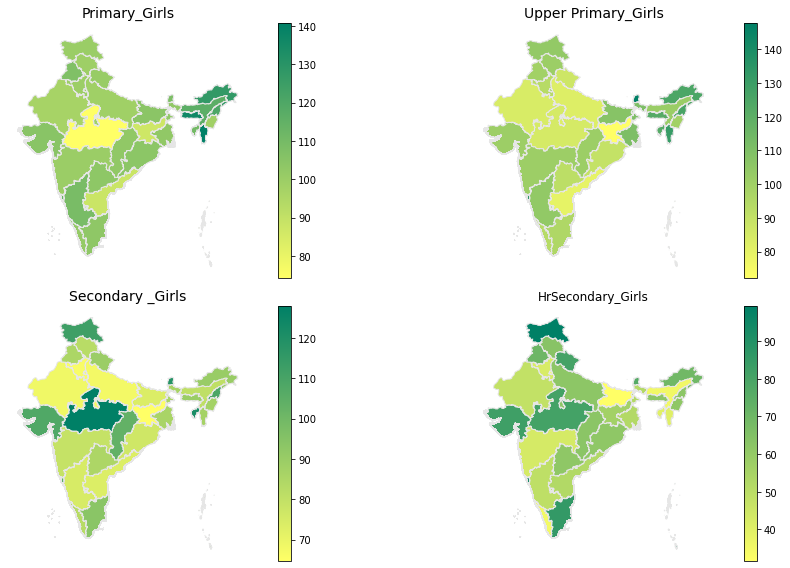

In [11]:
total = ger.columns[ger.columns.str.contains('Girls')]
geo_plot(india,ger,'2014-15',total,'summer_r')

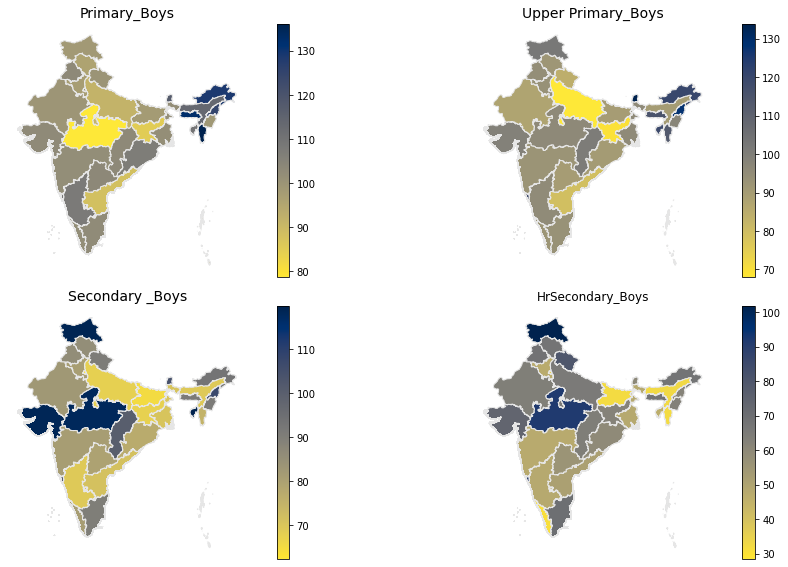

In [12]:
total = ger.columns[ger.columns.str.contains('Boys')]
geo_plot(india,ger,'2014-15',total,'cividis_r')

Respondendo a pergunta: **Como é a Taxa Bruta de Matrículas para meninos e meninas nos diversos níveis da vida escolar?** Em boa parte o total vai representar a taxa de garotos e garotas. Podemos perceber também que o GER das garotas é levemente maior que o dos garotos. Podemos ver que no centro do país há uma concentração do GER de meninos em torno de Madhaya Pardesh, no caso das meninas isso está mais distribuído nos estados que fazem fronteira com outros países.

## Eletricidade, computadores e banheiros

In [13]:
water.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,98.17,98.68,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,98.69
1,Andaman & Nicobar Islands,2014-15,99.55,98.77,100.00,100.00,100.00,100.00,0.00,0.0,100.0,0.00,99.52
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,100.00
3,Andhra Pradesh,2013-14,86.89,94.53,99.66,90.91,87.26,98.84,96.02,97.5,100.0,97.52,90.35
4,Andhra Pradesh,2014-15,91.85,96.07,100.00,100.00,90.00,99.56,97.48,100.0,100.0,98.37,93.74


In [14]:
computer.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,30.40,73.68,89.74,0.00,100.00,97.92,0.00,0.00,100.00,0.00,53.06
1,Andaman & Nicobar Islands,2014-15,30.94,76.54,92.11,100.00,94.74,100.00,0.00,0.00,100.00,0.00,57.25
2,Andaman & Nicobar Islands,2015-16,28.44,78.57,92.50,0.00,94.74,100.00,0.00,0.00,100.00,0.00,57.00
3,Andhra Pradesh,2013-14,12.73,42.72,86.99,45.45,17.07,68.18,73.23,60.00,33.33,19.32,29.57
4,Andhra Pradesh,2014-15,10.29,44.15,88.46,50.00,62.22,68.38,76.59,70.97,66.67,41.60,28.06


Nesse caso não houve tantos problemas com relação à tabela de dados não houve nenhum problema de dados com "NR" ou "@", portanto podemos ir direto para a parte de visualização. Analisando o gráfico geral do país verifica-se que no caso da instalação de água está próxima do 100%, sendo o __High Secondary__ a que chega mais próximo com 97%. O mais agravante aqui é a porcentagem de computadores em escolas, na qual em __High Secondary__ e __Secondary__ tem cerca de 53% o que é um número bastante ruim visto que estamos em um mundo totalmente globalizado e o uso da internet tanto no quesito aprendizagem, profissional e até contato social. Além disso, na escola é necessário que o aluno tenha contato com o maior número de caminhos para seu futuro profissional. Apesar de baixo, a India tem se esforçado para aumentar esse valor, em 2013 apenas 26% das escolas tinham computador disponǘiel para o __High Secondary__ e em 3 anos conseguiram dobrar o número de escolas, um resultado louvável. Por fim nas duas séries iniciais temos um valor de 10% a 19% que pode ser justificado por essas não necessitarem tanto de computadores, mas é preciso comparar com outros países para saber ao certo se o valor é baixo ou não.

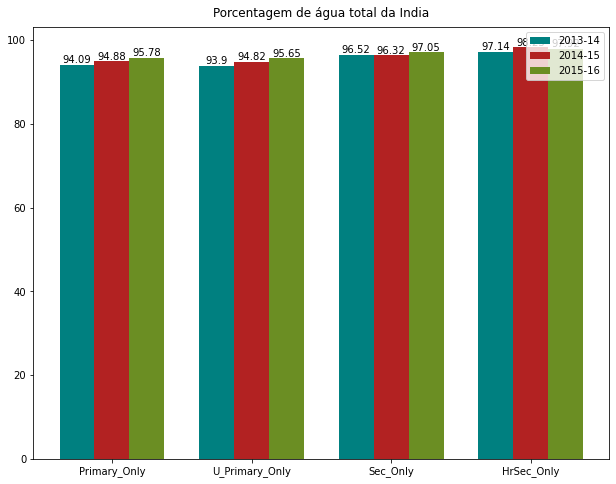

In [15]:
generate_graphs_india(water,'Only','Porcentagem de água total da India')

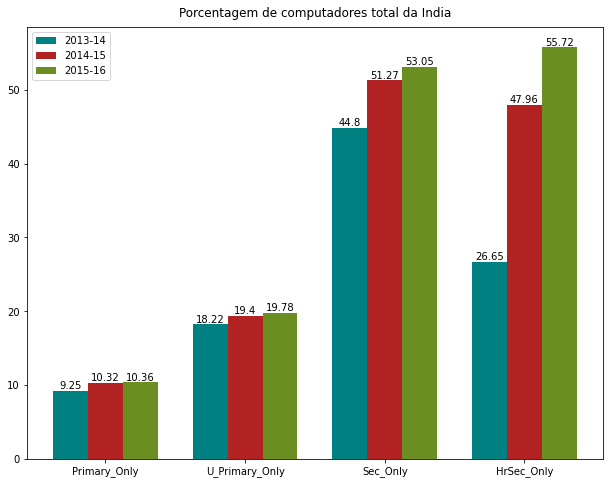

In [16]:
generate_graphs_india(computer,'Only','Porcentagem de computadores total da India')

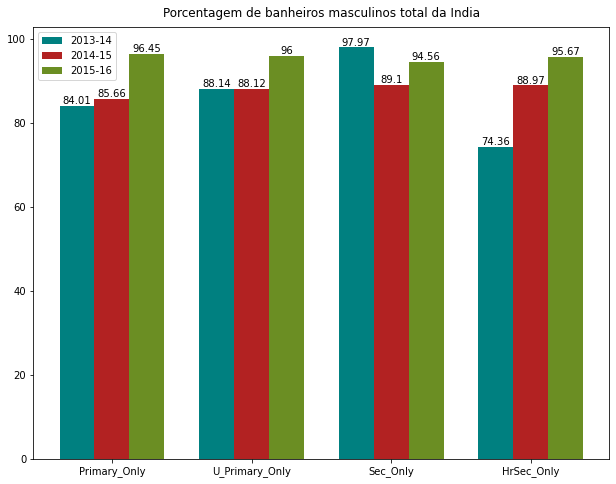

In [17]:
generate_graphs_india(toilet_boy,'Only','Porcentagem de banheiros masculinos total da India')

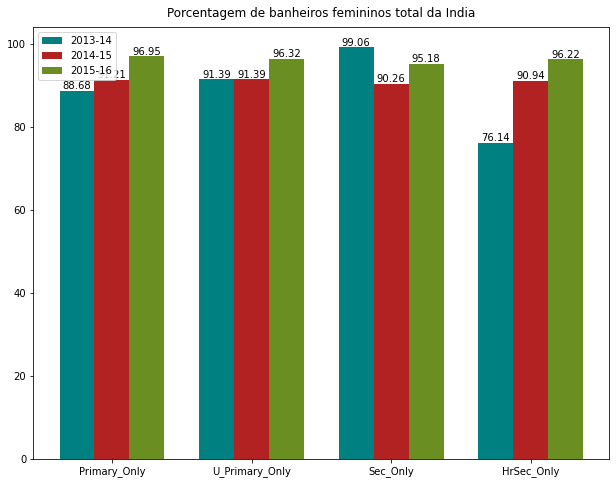

In [18]:
generate_graphs_india(toilet_girls,'Only','Porcentagem de banheiros femininos total da India')

No caso da porcentagem de escolas com banheiros para meninos(as) nota-se que estão próximos do 90% ou 100% para quase todos. Além disso a porcentagem é um pouco maior para as meninas por motivos biológicos. No caso do __High Secondary__ havia apenas cerca de 76% de banheiros para meninos e meninas o que cresceu com maior velocidade do que os outros, mostrando um investimento da Índia nessa série.

**Os meninos e as meninas têm água e banheiros suficientes disponíveis?** essa é uma pergunta um pouco mais complicada de responder. Aparentemente a resposta é sim, mas deveríamos saber utilizando, por exemplo correlação, para saber se um tem alguma correlação com o outro, porém pegar numericamente fica complicado uma vez que nas tabelas há não só o número de banheiros para cada série quanto para cada série em conjunto com outra, então que números utilizar? Esse será o meu próximo desafio nesse conjunto de dados entender essa parte, mas os dados apresentam uma ideia de que talvez sim. Outra coisa que os dados indicam é que o estado Meghalaya apresenta os menores porcentagens de banheiros diferentes de 0. 

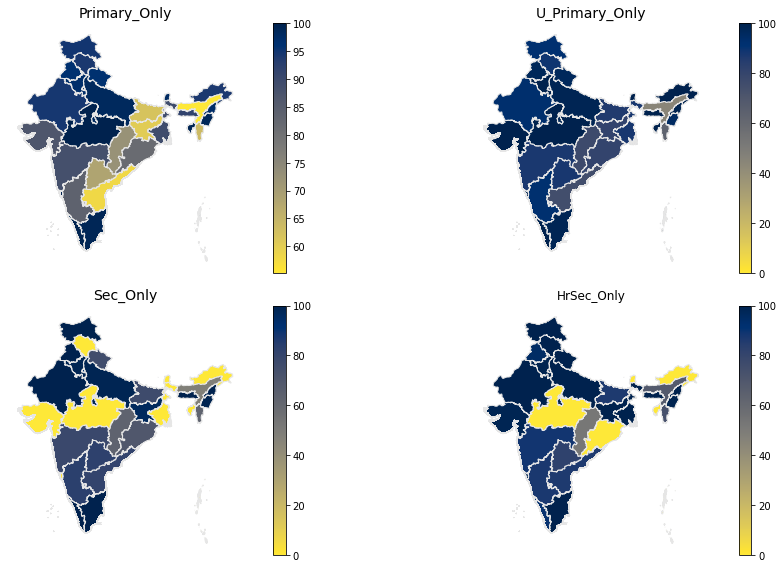

In [19]:
total = toilet_boy.columns[toilet_boy.columns.str.contains('Only')]
geo_plot(india,toilet_boy,'2014-15',total,'cividis_r')

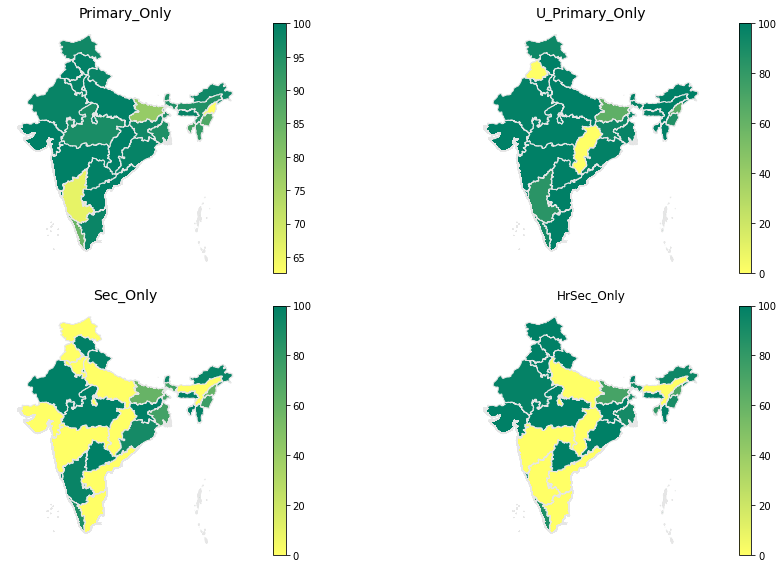

In [20]:
total = toilet_girls.columns[toilet_girls.columns.str.contains('Only')]
geo_plot(india,toilet_girls,'2014-15',total,'summer_r')

## Conclusão

Analisamos todos os dados aqui apresentados, conseguimos perceber algumas coisas interessantes:

1. Evasão escolar tem um máximo no __Secondary__ o que pode ser causado pela prova para entrada do EM.
2. O GER do __High Secondary__ é menor que o __Secondary__ que a causa pode ser exatamente a barreira de evasão do __Secondary__
3. Utilizando cálculos podemos perceber quais os estados que devem ter um melhor investimento em impedir a evasão dos alunos ou para melhorar o GER.
4. A Índia tem investido em melhorar suas escolas principalmente dos últimos níveis em questão de banheiros, água e computadores e temos os estados com os menores índices.
5. Existem regiões que precisam ser contabilizadas a evasão escolar e o GER.

Espero que tenha gostado, comente sobre o que eu fiz e o que eu não fiz ou sobre como ficou minha visualização pois será assim que vou melhorar. Bons estudos para todos!